<a href="https://colab.research.google.com/github/mitali-dxt/Digit_Recognition_Project/blob/master/Deep_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os
## IMPORT DATASET
from keras.datasets import mnist

data = mnist.load_data()

**Define Training and Testing data**

In [12]:
(X_train , y_train), (X_test , y_test) = data

In [13]:
#Reshape the training data
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

In [14]:
#Normalizing values from 0-255 to 0-1
X_train = X_train /255
X_test = X_test/255

In [15]:
from tensorflow.keras.utils import to_categorical

print(y_test.shape)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

(10000,)
10


In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
#Define Model
model = Sequential()

#Add First Hidden Layer
model.add(Dense(32, input_dim = 28*28 , activation='relu'))

#Add Second Hidden Layer
model.add(Dense(64, activation='relu'))

#Add Output layer having 10 neurons (since there are 10 classes/categories in target variable)
model.add(Dense(10, activation='softmax'))


In [18]:
model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [19]:
#Print Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 27882 (108.91 KB)
Trainable params: 27882 (108.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
#Train Model
model.fit(X_train, y_train, epochs=10 , batch_size=100)

Epoch 1/10
600/600 [==============================] - 5s 5ms/step - loss: 0.4214 - accuracy: 0.8808
Epoch 2/10
600/600 [==============================] - 3s 4ms/step - loss: 0.1977 - accuracy: 0.9431
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.1541 - accuracy: 0.9555
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1304 - accuracy: 0.9617
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1125 - accuracy: 0.9667
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1001 - accuracy: 0.9701
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0899 - accuracy: 0.9729
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0825 - accuracy: 0.9751
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0747 - accuracy: 0.9772
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0702 - accuracy: 0.9785

**Check Model Performance**

In [21]:
scores = model.evaluate(X_test, y_test)
print(scores)  ## return loss and accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.1004 - accuracy: 0.9719
[0.10041918605566025, 0.9718999862670898]


In [22]:
# Directory containing the digit images
img_dir = '/content/sample_data/digits'

1/1 [==============================] - 0s 21ms/step
Predicted digit for digit6.png: 6


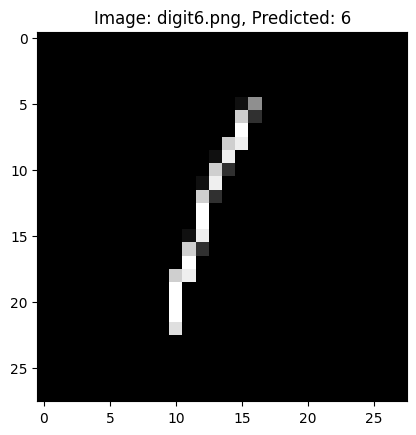

1/1 [==============================] - 0s 22ms/step
Predicted digit for digit10.png: 7


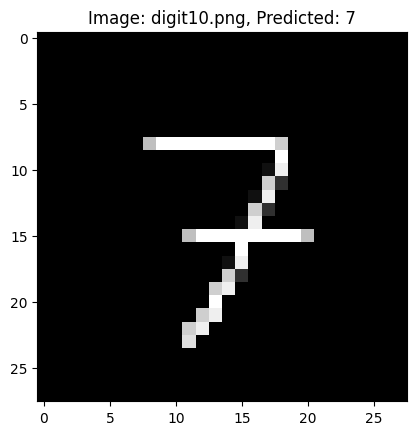

1/1 [==============================] - 0s 21ms/step
Predicted digit for digit11.png: 0


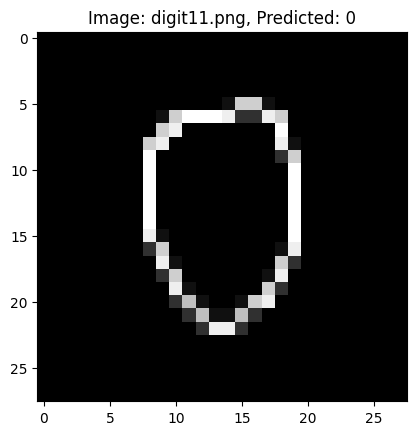

1/1 [==============================] - 0s 20ms/step
Predicted digit for digit18.png: 7


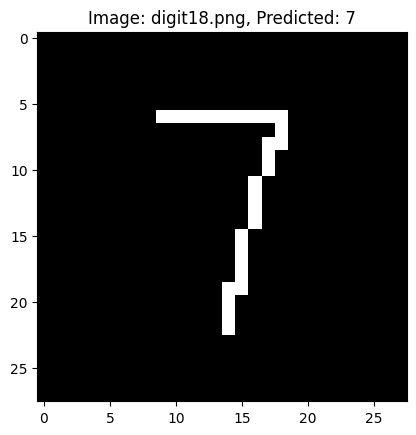

1/1 [==============================] - 0s 21ms/step
Predicted digit for digit8.png: 5


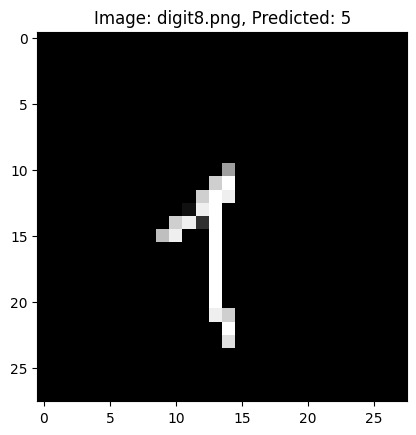

1/1 [==============================] - 0s 26ms/step
Predicted digit for digit7.png: 1


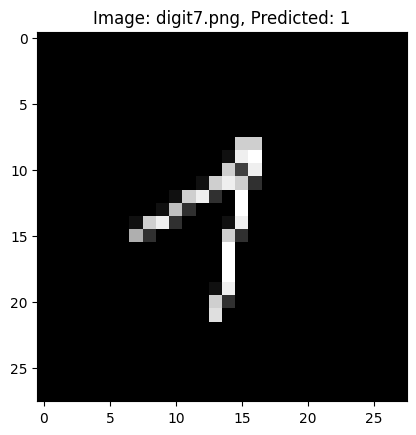

1/1 [==============================] - 0s 25ms/step
Predicted digit for digit1.png: 7


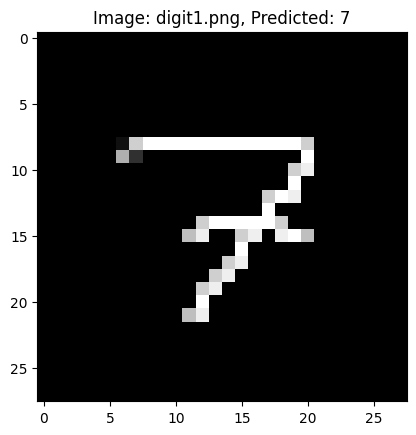

1/1 [==============================] - 0s 22ms/step
Predicted digit for digit14.png: 2


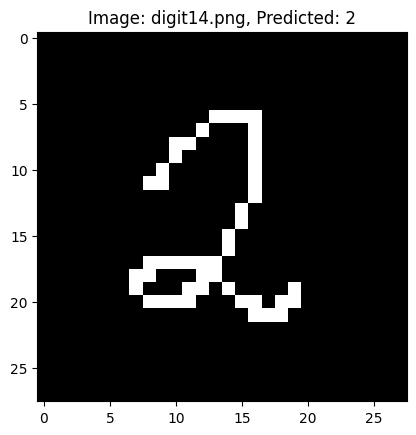

1/1 [==============================] - 0s 20ms/step
Predicted digit for digit2.png: 2


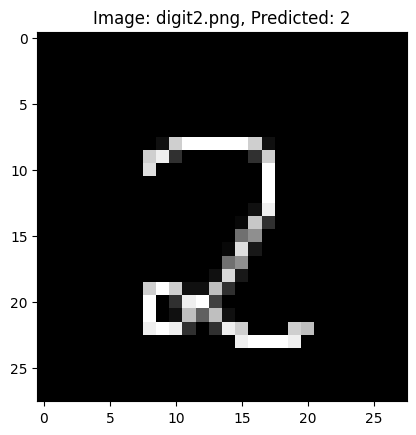

1/1 [==============================] - 0s 21ms/step
Predicted digit for digit19.png: 4


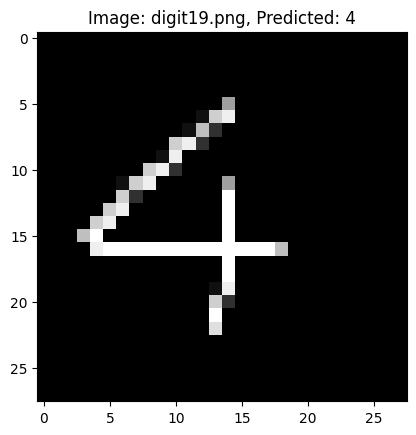

1/1 [==============================] - 0s 23ms/step
Predicted digit for digit15.png: 1


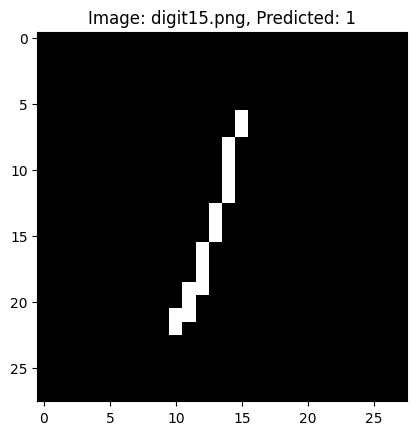

1/1 [==============================] - 0s 20ms/step
Predicted digit for digit17.png: 4


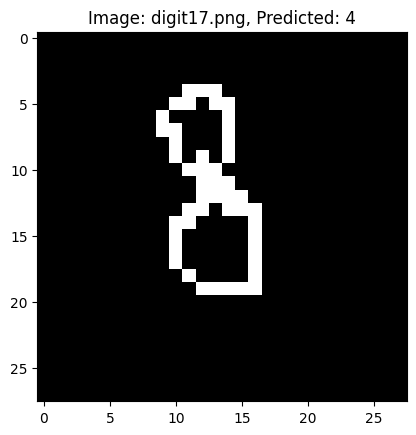

1/1 [==============================] - 0s 31ms/step
Predicted digit for digit5.png: 5


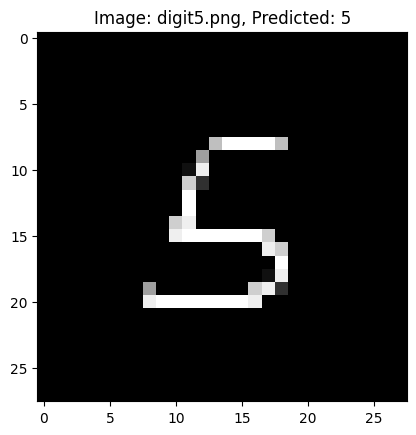

1/1 [==============================] - 0s 22ms/step
Predicted digit for digit3.png: 9


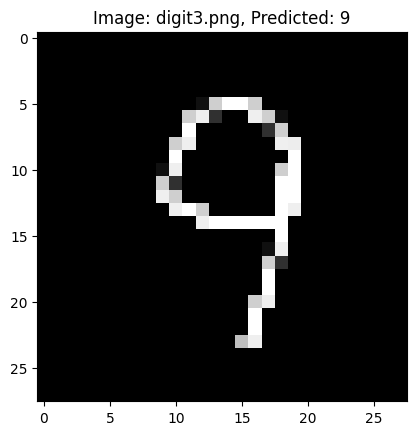

1/1 [==============================] - 0s 21ms/step
Predicted digit for digit16.png: 2


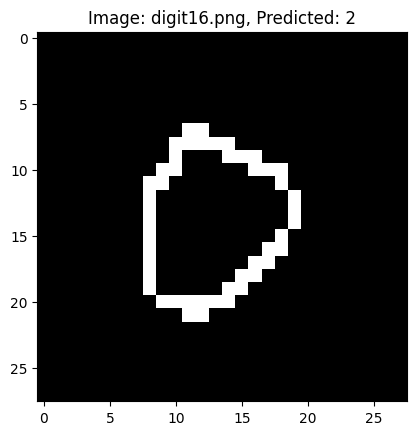

1/1 [==============================] - 0s 22ms/step
Predicted digit for digit9.png: 7


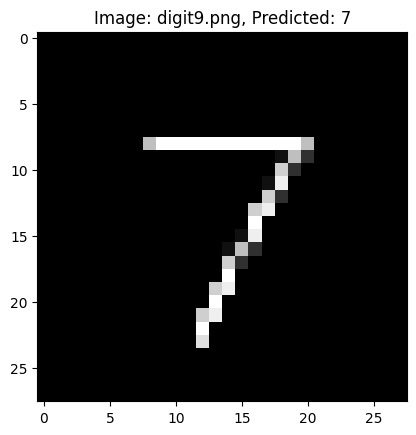

1/1 [==============================] - 0s 29ms/step
Predicted digit for digit12.png: 0


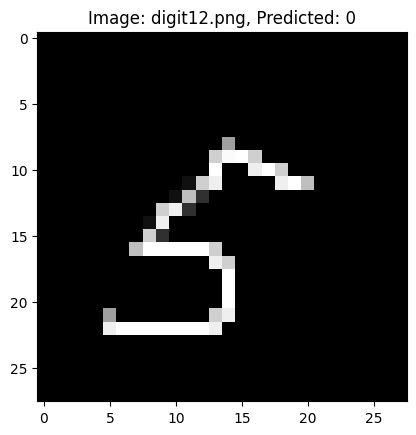

1/1 [==============================] - 0s 48ms/step
Predicted digit for digit4.png: 8


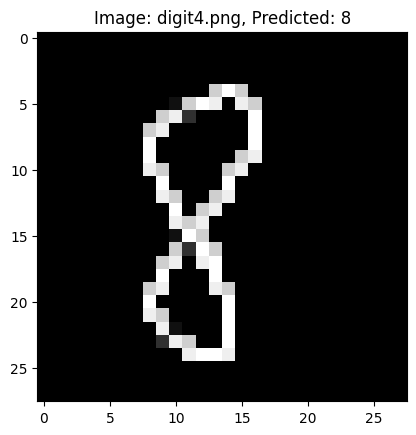

1/1 [==============================] - 0s 29ms/step
Predicted digit for digit13.png: 2


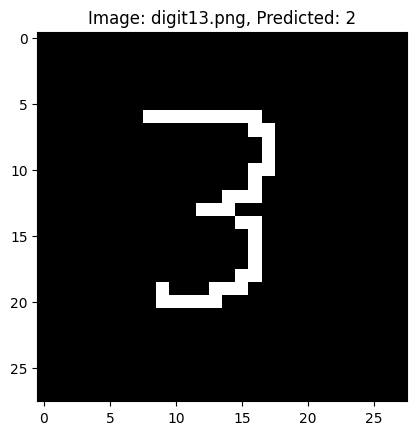

In [31]:
# Process each image in the directory
for img_name in os.listdir(img_dir):
    img_path = os.path.join(img_dir, img_name)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = 255 - img_array  # Invert colors if necessary
    img_array = img_array.astype('float32') / 255.0
    img_array = img_array.flatten()
    img_array = img_array.reshape(1, 28*28)

    # Predict the digit
    prediction = model.predict(img_array)
    predicted_digit = np.argmax(prediction)
    print(f'Predicted digit for {img_name}: {predicted_digit}')

    # Display the image
    plt.imshow(img_array.reshape(28, 28), cmap='gray')
    plt.title(f'Image: {img_name}, Predicted: {predicted_digit}')
    plt.show()

